# Improving results using LSTM
Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to recall past data in memory.

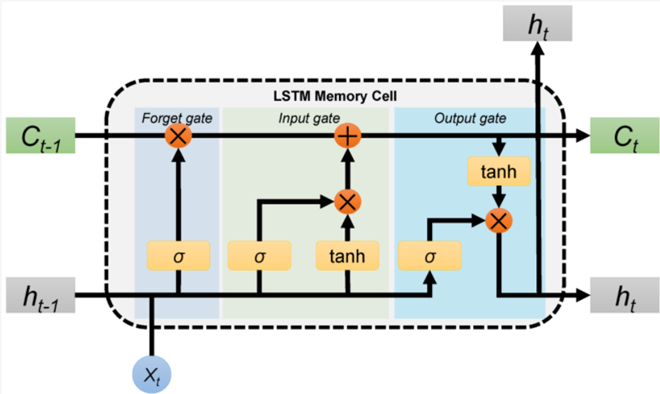

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 38kB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
tf.__version__

'2.4.1'

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
X_train[0][:5]

[1, 14, 22, 16, 43]

In [6]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

In [7]:
X_train.shape

(25000, 100)

In [16]:
vocab_size = 20000
embed_size = 128

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 51s 251ms/step - loss: 0.5387 - accuracy: 0.6992 - val_loss: 0.3374 - val_accuracy: 0.8522
Epoch 2/5
196/196 [==============================] - 48s 247ms/step - loss: 0.2265 - accuracy: 0.9142 - val_loss: 0.3521 - val_accuracy: 0.8462
Epoch 3/5
196/196 [==============================] - 48s 247ms/step - loss: 0.1485 - accuracy: 0.9510 - val_loss: 0.4263 - val_accuracy: 0.8410
Epoch 4/5
196/196 [==============================] - 48s 247ms/step - loss: 0.0926 - accuracy: 0.9694 - val_loss: 0.5255 - val_accuracy: 0.8276
Epoch 5/5
196/196 [==============================] - 49s 248ms/step - loss: 0.0677 - accuracy: 0.9795 - val_loss: 0.5718 - val_accuracy: 0.8292


In [13]:
history.history

{'accuracy': [0.7861599922180176,
  0.9078800082206726,
  0.9453999996185303,
  0.9625599980354309,
  0.9750400185585022],
 'loss': [0.4381077289581299,
  0.23624806106090546,
  0.15507301688194275,
  0.10623522102832794,
  0.073610819876194],
 'val_accuracy': [0.8521599769592285,
  0.8461599946022034,
  0.8410400152206421,
  0.8276399970054626,
  0.829200029373169],
 'val_loss': [0.33739855885505676,
  0.3520865738391876,
  0.42632097005844116,
  0.5255034565925598,
  0.5718138813972473]}

In [14]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

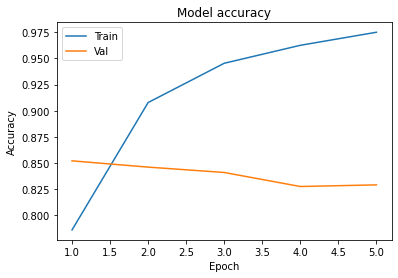

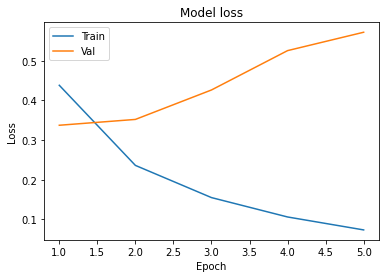

In [15]:
plot_learningCurve(history, 5)